## **Python course:** SKlearn for unsupervised learning

### Import libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [30]:
creditcard_df = pd.read_csv('marketing_data.csv')
# CUSTID: Identification of the credit card holder
# BALANCE: Amount of balance left in the customer's account to make purchases
# BALANCE_FREQUENCY: Balance update frequency, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Number of purchases made from the account
# ONEOFFPURCHASES: Maximum purchase amount made at one time
# INSTALLMENTS_PURCHASES: Amount of the purchase made in installments
# CASH_ADVANCE: cash advance
# PURCHASES_FREQUENCY: frequency with which purchases are made, score between 0 and 1 (1 = frequent purchases, 0 = infrequent purchases)
# PURCHASES_FREQUENCY: Frequency of Purchases being made, score between 0 and 1 (1 = purchase frequently, 0 = do not purchase frequently)
# ONEOFF_PURCHASES_FREQUENCY: How often purchases are made in one go (1 = buy often, 0 = not often buy)
# PURCHASES_INSTALLMENTS_FREQUENCY: How often installment purchases are made (1 = often, 0 = not often)
# CASH_ADVANCE_FREQUENCY: how often the expense is paid in advance
# CASH_ADVANCE_TRX: number of transactions made with "Cash in advance"
# PURCHASES_TRX: number of purchase transactions made
# CREDIT_LIMIT: credit card limit for the user
# PAYMENTS: Number of payments made by the user
# MINIMUM_PAYMENTS: minimum amount of payments made by the user
# PRC_FULL_PAYMENT: percentage of the total payment paid by the user
# TENURE: Years that the user has been using the credit card service

In [31]:
creditcard_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [32]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<AxesSubplot:>

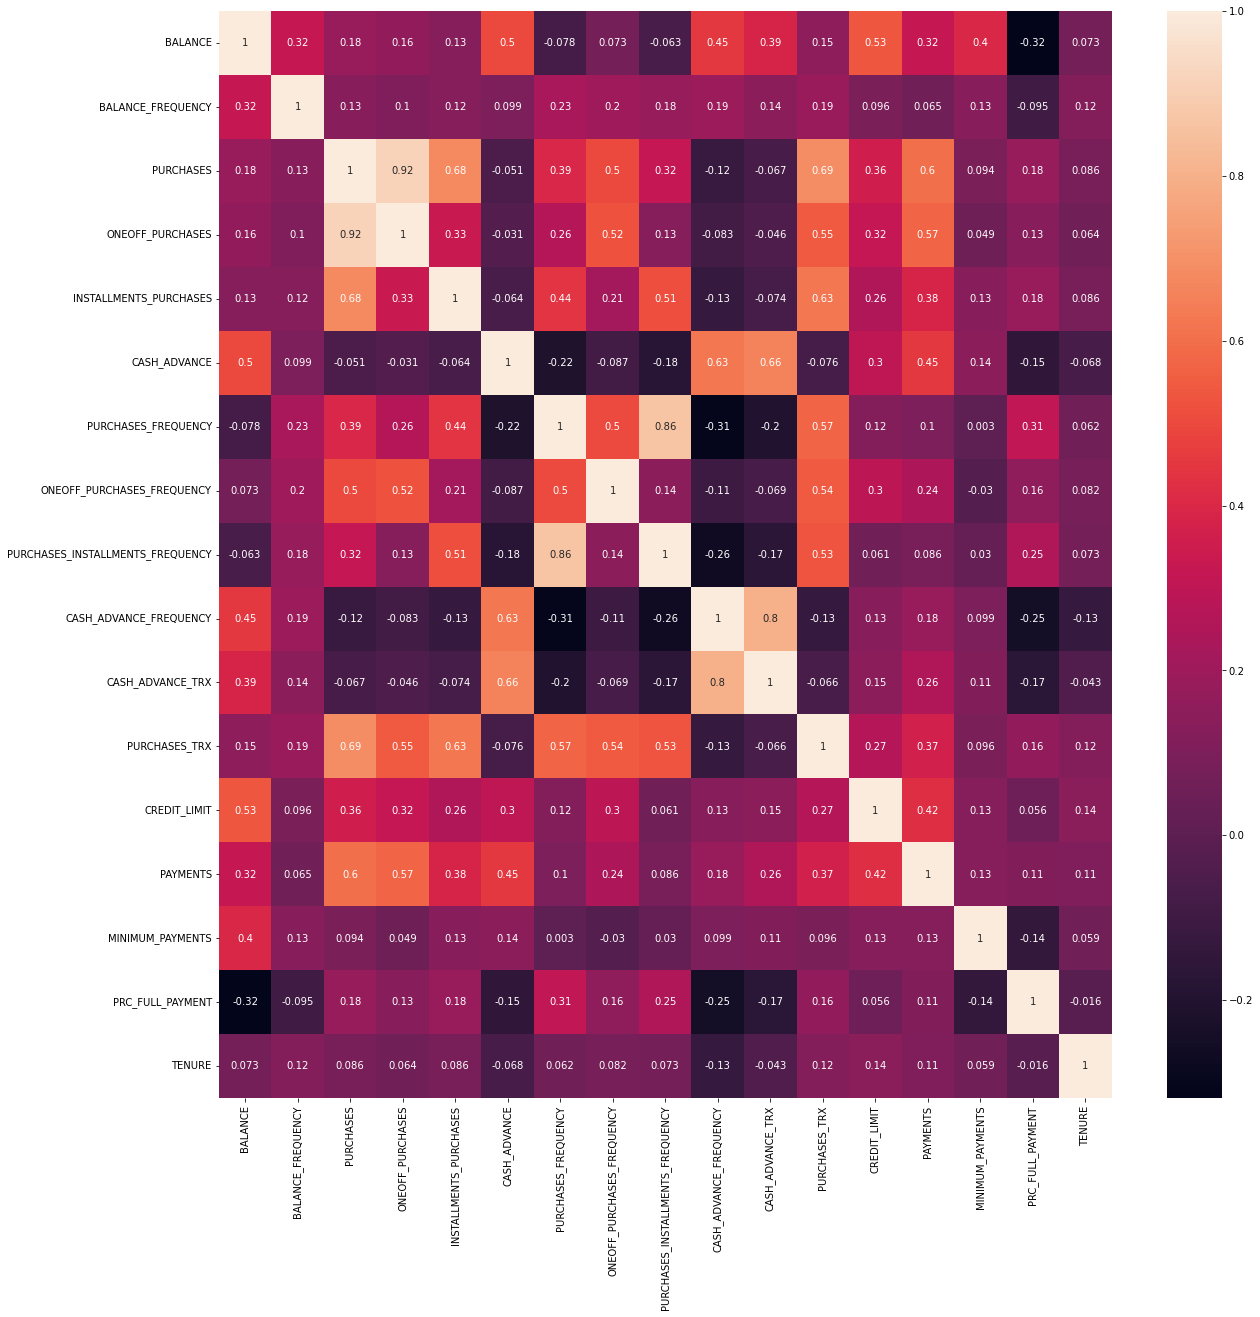

In [33]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)
# 'PURCHASES' high positive correlation with one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Very high positive correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

In [34]:
# Let's fill in the missing data with the average of the 'MINIMUM_PAYMENT' field
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
# Let's fill in the missing data with the average of the 'CREDIT_LIMIT' field
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df.drop("CUST_ID", axis = 1, inplace=True)

c:\Users\alvaro.villadangos.1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\alvaro.villadangos.1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\alvaro.villadangos.1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

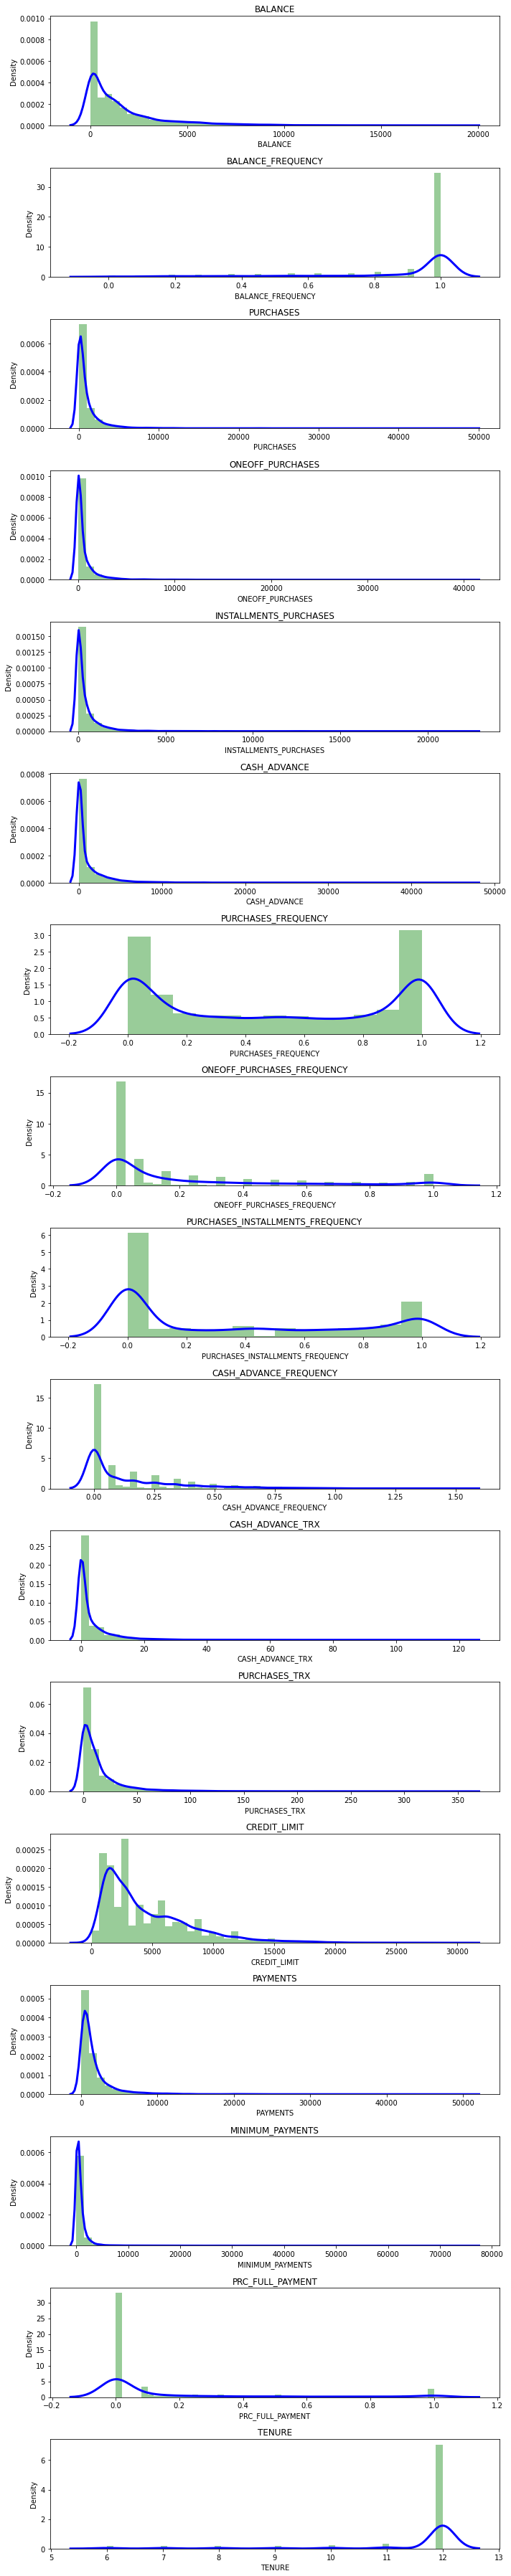

In [35]:
# KDE is used to visualize the probability density of a continuous variable. 
# KDE shows us the probability density for different values ​​of a continuous variable.

# Average balance is $1500
# 'Balance_Frequency' for many users it is updated very frequently ~1
# For the field 'PURCHASES_FREQUENCY', there are two different groups of clients
# For the fields 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' the vast majority of users do not pay everything at once or in installments
# Very few customers fully pay the debt 'PRC_FULL_PAYMENT'~0
# The average credit limit is around $4,500
# Most customers have been using the service for ~11 years

plt.figure(figsize = (10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(len(creditcard_df.columns), 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [ ]:
# Let's start by first scaling the dataset
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

### KMeans

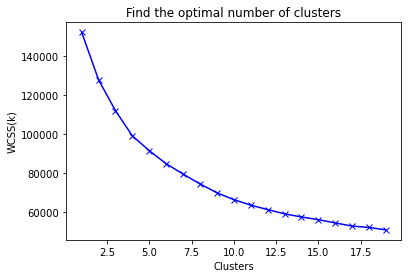

In [36]:
### Elbow method

scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_) #WCSS


plt.plot(range_values, scores_1, 'bx-')
plt.title("Find the optimal number of clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()



# With the graph we can see that in 4 clusters is where the elbow of the curve is formed.
# However, the values ​​do not reduce to a linear form until the 8th cluster.
# Let us therefore choose a number of clusters equal to 8.

### KMeans

In [16]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [17]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.336050         -0.347078  -0.289267        -0.215966   
1 -0.162873          0.392754   0.473201         0.617653   
2 -0.701163         -2.144787  -0.311233        -0.235823   
3 -0.366639          0.333155  -0.038243        -0.244205   
4  0.016269          0.403662  -0.361585        -0.246994   
5  1.690200          0.396003  -0.219127        -0.157223   
6  1.923051          0.337717  11.212042        10.600367   
7  0.934901          0.467049   2.252953         1.707412   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.286835     0.068284           -0.203078   
1              -0.016010    -0.333808            0.944809   
2              -0.302542    -0.319756           -0.557150   
3               0.358036    -0.363598            0.991214   
4              -0.401079    -0.090629           -0.865326   
5              -0.229345     2.020153           -0.480727   
6               7.033118     0.419625            1.046983   
7               2.190297    -0.192704            1.160751   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.288661                        -0.224549   
1                   1.880640                         0.090573   
2                  -0.445187                        -0.440134   
3                  -0.386909                         1.206355   
4                  -0.409276                        -0.757165   
5                  -0.214389                        -0.417038   
6                   1.915501                         0.981334   
7                   1.548096                         1.257221   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.308663         0.000996     -0.388117    -0.567159   
1              -0.408068        -0.324367      0.532389     0.383794   
2              -0.520622        -0.376063     -0.419936    -0.175963   
3              -0.475154        -0.361158      0.187123    -0.260825   
4               0.110146        -0.024439     -0.486185    -0.306840   
5               1.925066         1.939912     -0.268180     1.027024   
6              -0.258912         0.061229      5.362438     3.044064   
7              -0.310075        -0.208712      2.800594     1.235324   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.392680        -0.209145         0.014011 -3.203733  
1  0.100567        -0.162365         0.414080  0.262038  
2 -0.192408        -0.256478         0.283762  0.199336  
3 -0.217616        -0.045775         0.315794  0.257381  
4 -0.249619        -0.009712        -0.456880  0.272704  
5  0.808261         0.528696        -0.395008  0.069894  
6  8.098975         1.120318         1.110132  0.310863  
7  1.282259         0.575854         0.273318  0.333736

In [18]:
# To better understand these values, we will apply the inverse transformation.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers

# NOTE: Results may vary
# 7º Customer Cluster (Transactors): Those are the customers who pay the least amount of interest charges and are careful with their money, Lowest Balance Cluster ($104) and Cash Advance ($303), Full Payment Percentage = 23%
# 3º Customer Cluster (Revolvers): using credit card as loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), cash advance transactions high (16) and low payout percentage (3%)
# 6º Customer Cluster (VIP/Prime): high credit limit $16K and higher percentage of full payment, goal to increase credit limit and increase spending habits
# 5º Customer Cluster (low tenure): these are clients with low seniority (7 years), low balance

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   865.015978          0.795051    385.181720       233.977974   
1  1225.469199          0.970310   2014.205154      1617.614991   
2   105.063837          0.369191    338.250830       201.019898   
3   801.347031          0.956192    921.498712       187.107663   
4  1598.338053          0.972895    230.672016       182.477546   
5  5082.483731          0.971080    535.035681       331.479330   
6  5567.142164          0.957273  24957.905000     18186.875667   
7  3510.393168          0.987910   5816.674519      3426.390962   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             151.686061  1122.064941            0.408846   
1             396.590163   278.861158            0.869548   
2             137.482244   308.328143            0.266740   
3             734.835246   216.389570            0.888173   
4              48.376545   788.817093            0.143054   
5             203.673753  5215.225625            0.297412   
6            6771.029333  1858.844605            0.910556   
7            2391.725865   574.762188            0.956216   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.116344                         0.275196   
1                   0.763489                         0.400433   
2                   0.069650                         0.189517   
3                   0.087035                         0.843874   
4                   0.080363                         0.063520   
5                   0.138501                         0.198696   
6                   0.773889                         0.754444   
7                   0.664285                         0.864089   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.196911         3.255627      5.062701   2430.891398   
1               0.053486         1.035262     27.943038   5890.847444   
2               0.030962         0.682472      4.271804   3854.224762   
3               0.040061         0.784187     19.361014   3545.460071   
4               0.157186         3.082046      2.625092   3378.041452   
5               0.520370        16.487298      8.043880   8231.183078   
6               0.083333         3.666667    148.000000  15570.000000   
7               0.073095         1.824519     84.322115   8989.062500   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0    596.373827       376.802926         0.157813   7.229904  
1   2024.274180       485.822410         0.274826  11.867993  
2   1176.141747       266.495312         0.236710  11.784081  
3   1103.167378       757.529897         0.246079  11.861760  
4   1010.522498       841.572105         0.020085  11.882266  
5   4072.979303      2096.311415         0.038182  11.610855  
6  25178.882690      3475.059479         0.478409  11.933333  
7   5445.158665      2206.210364         0.233656  11.963942

In [19]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([4, 6, 2, ..., 0, 0, 0])

In [20]:
# We concatenate the labels of the clusters with the original dataset
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        4  
1  4103.032597       1072.340217          0.222222      12        5  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        4  
4   678.334763        244.791237          0.000000      12        4

### Apply PCA to visualize results

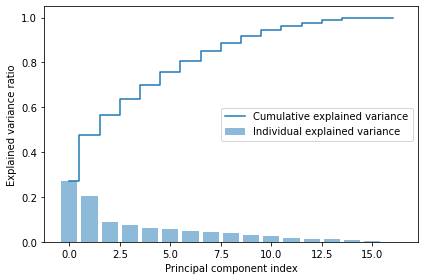

In [26]:
# Instantiate PCA
pca = PCA()

# Determine transformed features
X_train_pca = pca.fit_transform(creditcard_df_scaled)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
# We get the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221929, -1.07645146],
       [-1.13829366,  2.50647743],
       [ 0.96967979, -0.3835187 ],
       ...,
       [-0.92620286, -1.81078716],
       [-2.33655051, -0.65796729],
       [-0.55642511, -0.40046465]])

In [23]:
# We create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])

# We concatenate the labels of the clusters with the dataframe of the main components
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()

pca1      pca2  cluster
0 -1.682219 -1.076451        4
1 -1.138294  2.506477        5
2  0.969680 -0.383519        1
3 -0.873625  0.043165        4
4 -1.599433 -0.688581        4

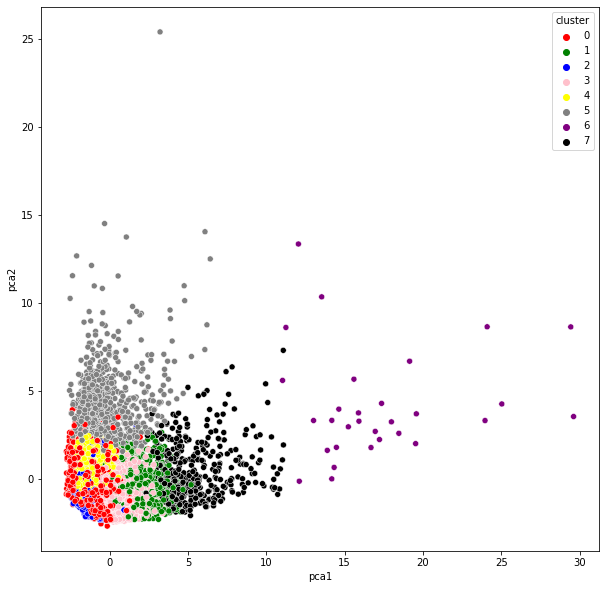

In [24]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()